--------------
# Playbook 4 : CNN Layer Visualisations
--------------
This playbooks takes a model from playbook 3, and generates images that maximise feature activations of the filters in the various layers. 

## 1. Connect to google drive colab

In [0]:
# Like a great many other libraries in Python, Keras is a mess of incompatability. 
# Need to use 2.2.4 or it breaks the CapsNet Code. I therefore standardise on 
# keras and tensorflow versions
!pip install gast==0.3.2
!pip install keras==2.2.4
!pip install tensorflow==1.15.2

     |████████████████████████████████| 110.5MB 36kB/s 
     |████████████████████████████████| 3.8MB 41.6MB/s 
     |████████████████████████████████| 512kB 37.4MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=2a173f372349377c43243953950aa2ccd7b51086ba80c61f3acbb96f70abbc0c
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installatio

In [0]:
%env GPATH=/content/gdrive/My Drive/MSc AI/Project/msccode
from google.colab import drive
drive.mount('/content/gdrive')

env: GPATH=/content/gdrive/My Drive/MSc AI/Project/msccode
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## 2. Import required packages

In [0]:
%tensorflow_version 1.15

import os
import matplotlib.pyplot as plt
import numpy as np
from pandas.io.parsers import read_csv
from sklearn.utils import shuffle
import keras
from keras.models import model_from_json
from keras.models import load_model
from keras.utils import CustomObjectScope
from keras.initializers import glorot_uniform
import tensorflow as tf

print(tf.__version__)
print(keras.__version__)

GPATH=os.environ['GPATH']

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.15`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
1.15.2
2.2.4


## 3. Load required model files

### 3.1 Helper functions to load model files and read the conv layers in a model

In [0]:
def load_my_model(path, json_file, weight_file):
    # load json and create model
    json_file = open(path + json_file, 'r')
    json_model = json_file.read()
    json_file.close()

    with CustomObjectScope({'GlorotUniform': glorot_uniform()}):
        loaded_model = model_from_json(json_model)

    loaded_model.load_weights(path + weight_file)
    return loaded_model

def get_conv_layers(model):
    # summarize feature map shapes
    conv_layers = []
    for i in range(len(model.layers)):
	      layer = model.layers[i]
	      # check for convolutional layer
	      if 'conv'in layer.name:
				    conv_layers.append((i, layer.name, layer.output.shape))
			 
    return conv_layers

### 3.2 Load the model and show the conv layers it contains

In [0]:
# load weights into new model
print("Loading model from disk")
model = load_my_model(GPATH + '/Models/', 
                      '3_Best_CNN_model.json', 
                      '3_Best_CNN_model.h5')
model.summary()

conv_layers = get_conv_layers(model)

for (i, name, shape) in conv_layers:
	print(i, name, shape)

Loading model from disk










_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_102 (Conv2D)          (None, 40, 40, 32)        2432      
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 36, 36, 32)        25632     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 12, 12, 64)        51264     
_________________________________________________________________
conv2d_105 (Conv2D)          (None, 10, 10, 64)        36928     
_________________________________________________________________
average_pooling2d_17 (Averag (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 4, 4, 

## 4. Filter Visualisation. 
Note that the code contained here is derived from Jason Brownlee's web site at 

https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

Sample filters from layer 0 (conv2d_102) in the model
-------------------------------------------------------


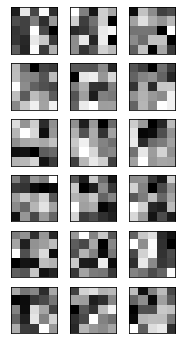

Sample filters from layer 1 (conv2d_103) in the model
-------------------------------------------------------


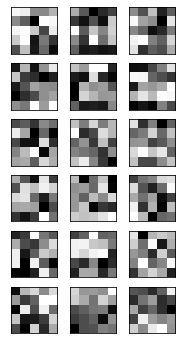

Sample filters from layer 3 (conv2d_104) in the model
-------------------------------------------------------


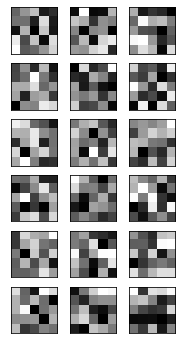

Sample filters from layer 4 (conv2d_105) in the model
-------------------------------------------------------


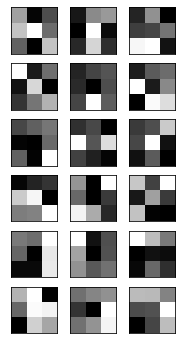

Sample filters from layer 6 (conv2d_106) in the model
-------------------------------------------------------


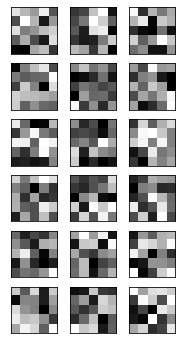

Sample filters from layer 7 (conv2d_107) in the model
-------------------------------------------------------


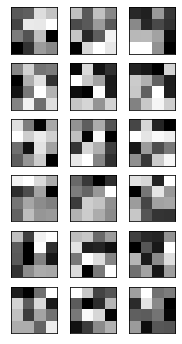

In [0]:
import matplotlib.pyplot as plt

def show_filters(model, layer, num_filters=6, num_channels=3):
    # retrieve weights from the second hidden layer
    filters, biases = model.layers[layer].get_weights()

    # normalize filter values to 0-1 so we can visualize them
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)

    fig = plt.figure(figsize=(num_channels,num_filters))  

    # plot first num_filters rows, with num_channels per row
    ix = 1
    for i in range(num_filters):
        # get the filter
        f = filters[:, :, :, i]
        # plot each channel filter separately
        for j in range(num_channels):
            # specify subplot and turn of axis
            ax = plt.subplot(num_filters, num_channels, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            plt.imshow(f[:, :, j], cmap='gray')
            ix += 1

    # show the figure
    plt.show()

for i in range(len(conv_layers)):
    layer, name, _ = conv_layers[i]
    print("Sample filters from layer %d (%s) in the model" % (layer, name))
    print("-" * 55)
    show_filters(model, layer)


##5. Feature Map Visualisation

This code is taken from from https://fairyonice.github.io/Visualization%20of%20Filters%20with%20Keras.html

###5.1 Define functions for generating images to maximise feature activation

In [0]:
import os
import matplotlib.pyplot as plt
import numpy as np
from pandas.io.parsers import read_csv
from sklearn.utils import shuffle
from keras import backend as K

class VisualizeImageMaximizeFmap(object):
    def __init__(self,pic_shape):
        '''
        pic_shape : a dimention of a single picture e.g., (96,96,1)
        '''
        self.pic_shape = pic_shape
        
    def find_n_feature_map(self, layer_name ,max_nfmap):
        '''
        shows the number of feature maps for this layer
        only works if the layer is CNN
        '''
        n_fmap = None
        for layer in model.layers:
            if layer.name == layer_name:
                weights = layer.get_weights()
                n_fmap=weights[1].shape[0]
        if n_fmap is None:
            print(layer_name + " is not one of the layer names..")
            n_fmap = 1
        n_fmap = np.min([max_nfmap,n_fmap])
        return(int(n_fmap))

    def find_image_maximizing_activation(self,
                                         iterate,
                                         input_img_data,
                                         picorig=False,
                                         n_iter = 30):
        '''
        The input image is scaled to range between 0 and 1
        picorig  : True  if the picture image for input is original scale
                         ranging between 0 and 225
                   False if the picture image for input is ranging [0,1]
        '''
            
        input_img_data = np.random.random((1, 
                                           self.pic_shape[0],
                                           self.pic_shape[1],
                                           self.pic_shape[2]))
        if picorig:
            ## if the original picture is unscaled and ranging between (0,225),
            ## then the image values are centered around 123 with STD=25
            input_img_data = input_img_data*25 + 123 


        ## I played with this step value but the final image looks to be robust
        step = 500 

        # gradient ascent
        loss_values = []
        for i in range(n_iter):
            loss_value, grads_value = iterate([input_img_data, 0])
            input_img_data += grads_value * step
            loss_values.append(loss_value) 
        return (input_img_data, loss_values)

    def create_iterate(self,input_img, layer_output, filter_index):
        '''
        layer_output[:,:,:,0] is (Nsample, 94, 94) tensor contains:
        W0^T [f(image)]_{i,j}], i = 1,..., 94, j = 1,..., 94
        
        layer_output[:,:,:,1] contains:
        W1^T [f(image)]_{i,j}], i = 1,..., 94, j = 1,..., 94
        
        W0 and W1 are different kernel!
        '''
        ## loss is a scalar 
        if len(layer_output.shape) == 4:
            ## conv layer 
            loss = K.mean(layer_output[:,  :, :, filter_index])
        elif len(layer_output.shape) ==2:
            ## fully connected layer
            loss = K.mean(layer_output[:, filter_index])
         
        # calculate the gradient of the loss evaluated at the provided image
        grads = K.gradients(loss, input_img)[0]
        # normalize the gradients
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # iterate is a function taking (input_img, scalar) and output [loss_value, gradient_value]
        iterate = K.function([input_img, K.learning_phase()], [loss, grads])
        return(iterate)

    def deprocess_image(self,x):
        # standardize to have a mean 0 and std  0.1 
        x -= x.mean()
        x /= (x.std() + 1e-5)
        x *= 0.1

        # Shift x to have a mean 0.5 and std 0.1
        # This means 95% of the x should be in between 0 and 1
        # if x is normal
        x += 0.5
        x = np.clip(x, 0, 1)

        # resclar the values to range between 0 and 255
        x *= 255
        x = np.clip(x, 0, 255).astype('uint8')

        return x

    def find_images(self,
                    input_img,
                    layer_names,
                    layer_dict, 
                    max_nfmap,
                    picorig=False,
                    n_iter=30):
        '''
        Input :

        input_img   : the alias of the input layer from the deep learning model
        layer_names : list containing the name of the layers whose feature maps to be used
        layer_dict  : symbolic outputs of each "key" layer (we gave them unique names).
        max_nfmap   : the maximum number of feature map to be used for each layer.
        pic_shape   : For example pic_shape = (96,96,1)

        Output : 
        dictionary 

        key = layer name 
        value = a list containing the tuple of (images, list of loss_values) that maximize each feature map
        '''
        argimage = {}
        ## Look for the image for each feature map of each layer one by one
        for layer_name in layer_names: ## the layer to visualize
            n_fmap = self.find_n_feature_map(layer_name,max_nfmap)
            layer_output = layer_dict[layer_name].output
            result = self.find_images_for_layer(input_img,
                                                layer_output,
                                                range(n_fmap),
                                                picorig=picorig,
                                                n_iter=n_iter)

            argimage[layer_name] = result
        return(argimage)

    def find_images_for_layer(self,
                              input_img,
                              layer_output,
                              indices,
                              picorig=False,
                              n_iter=30):
        '''
        indices : list containing index of 
                      --> filtermaps of CNN or 
                      --> nodes of fully-connected layer
        Output

        a list containing the tuple of (images, list of loss_values) 
        that maximize each feature map


        '''
        result_temp = []
        for filter_index in indices: # filtermap to visualize
                iterate = self.create_iterate(input_img, layer_output,filter_index)
                input_img_data, loss_values = self.find_image_maximizing_activation(
                    iterate,input_img,
                    picorig=picorig,
                    n_iter=n_iter)
                result_temp.append((input_img_data,loss_values))
        return(result_temp)

    def plot_images_wrapper(self,argimage,n_row = 8, scale = 1):
        '''
        scale : scale up or down the plot size
        '''
        pic_shape = self.pic_shape
        if pic_shape[2] == 1:
            pic_shape = self.pic_shape[:2]
        layer_names = argimage.keys() # np.sort(argimage.keys())

        for layer_name in layer_names:
            n_fmap = len(argimage[layer_name])
            n_col = np.ceil(n_fmap/float(n_row))
            fig = plt.figure(figsize=(n_col*scale,
                                      n_row*scale))
            fig.subplots_adjust(hspace=0.001,wspace=0.001)
            plt.title(layer_name + " n_featuremap=" + str(n_fmap))
            count = 1
            for value in argimage[layer_name]:
                input_img_data = value[0][0]
                img = self.deprocess_image(input_img_data)
                ax = fig.add_subplot(n_row,n_col,count,
                                    xticks=[],yticks=[])
                ax.imshow(img.reshape(*pic_shape),cmap="gray")
                count += 1
            plt.show()

### 5.2 Visualise the various layers

We generate 44x44x3 images as thats what we fed into the CNN model

#### 5.3.1 Visualise activations for the first 2 conv layers. 
Both have 32 filters

find images that maximize feature maps
plot them...


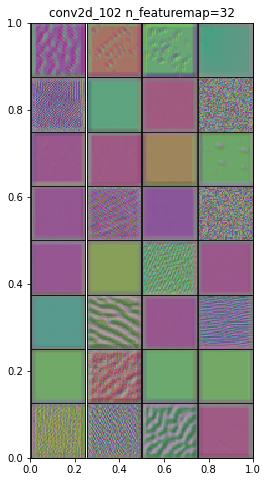

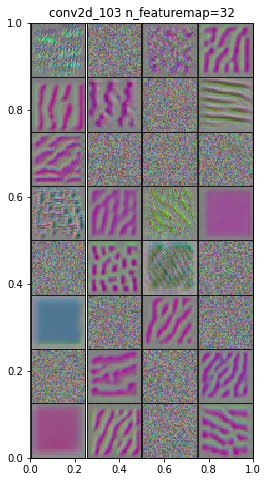

In [0]:
input_img = model.layers[0].input
layer_names = []
for (i, name, shape) in conv_layers:
	layer_names.append(name)
 
layer_dict = dict([(layer.name, layer) for layer in model.layers])

max_nfmap = 64 #np.Inf ## print ALL the images

# Visualise images from teh first 2 conv layers. Both have 32 filters
visualizer = VisualizeImageMaximizeFmap(pic_shape = (44,44,3))
print("find images that maximize feature maps")
argimage = visualizer.find_images(input_img,
                                  layer_names[0:2],
                                  layer_dict, 
                                  max_nfmap)
print("plot the images")
visualizer.plot_images_wrapper(argimage,n_row = 8, scale = 1)

#### 5.3.2 Visualise activations for the third and fourth conv layers. 
Both have 64 filters

find images that maximize feature maps
plot them...


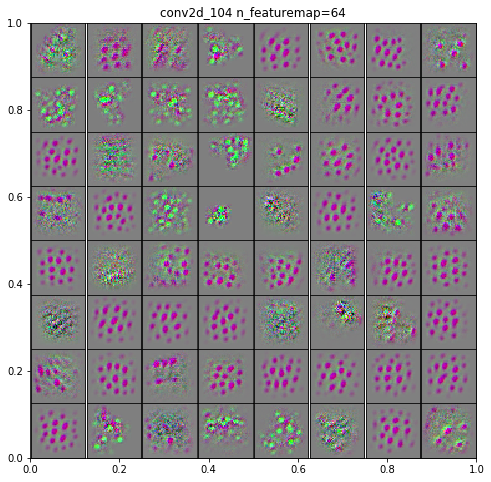

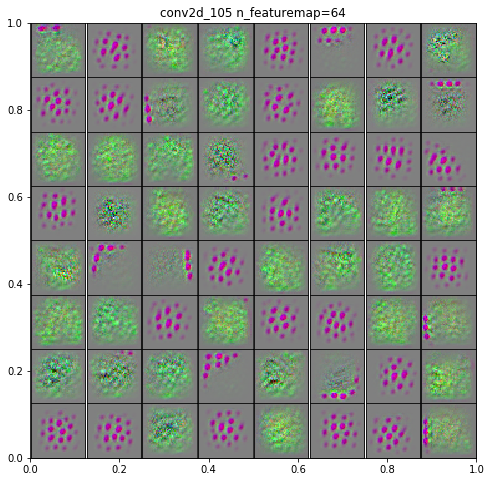

In [0]:
max_nfmap = 64 #np.Inf ## print ALL the images

visualizer = VisualizeImageMaximizeFmap(pic_shape = (44,44,3))
print("find images that maximize feature maps")
argimage = visualizer.find_images(input_img,
                                  layer_names[2:4],
                                  layer_dict, 
                                  max_nfmap)
print("plot them...")
visualizer.plot_images_wrapper(argimage,n_row = 8, scale = 1)

#### 5.3.3 Visualise activations for the fifth and sixth conv layers. 
Layer 5 has 128 filters and layer 6 has 256

In [0]:
max_nfmap = 256 #np.Inf ## print ALL the images
 
visualizer = VisualizeImageMaximizeFmap(pic_shape = (44,44,3))
print("find images that maximize feature maps")
argimage = visualizer.find_images(input_img,
                                  layer_names[4:6],
                                  layer_dict, 
                                  max_nfmap)
print("plot them...")
visualizer.plot_images_wrapper(argimage,n_row = 8, scale = 1)

Output hidden; open in https://colab.research.google.com to view.